<a href="https://colab.research.google.com/github/therealmolf/Machine-Learning/blob/master/Resnet101_Shopee2_Planas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "torch==1.4" "torchvision==0.5.0"

     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 25.1MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.basics import *
from fastai import *
from fastai.vision import *

In [ ]:
??vision.models.xresnet()

In [ ]:
??vision.create_body()

In [ ]:
??vision.cnn_learner()

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Shopee Objects/'
os.makedirs(base_dir,exist_ok=True)
os.chdir(base_dir)
os.getcwd()

'/content/gdrive/.shortcut-targets-by-id/1o9Lw6ASfakkHZu8IR1clSWJfOH6OGXwd/Shopee Objects'

In [ ]:
path = Path(os.getcwd()+'/train')
path2 = Path(os.getcwd()+'/gen_test')
classes = ['0'+str(i) if len(str(i))==1 else str(i) for i in range(42)]

In [ ]:
tfms = get_transforms()
bs=64
actual_test = ImageDataBunch.from_folder(path2, train=".",valid_pct=0.,size=112,bs=bs,num_workers=8).normalize(imagenet_stats)
actual_test

ImageDataBunch;

Train: LabelList (21062 items)
x: ImageList
Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112),Image (3, 112, 112)
y: CategoryList
01,01,01,01,01
Path: /content/gdrive/.shortcut-targets-by-id/1o9Lw6ASfakkHZu8IR1clSWJfOH6OGXwd/Shopee Objects/gen_test;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/.shortcut-targets-by-id/1o9Lw6ASfakkHZu8IR1clSWJfOH6OGXwd/Shopee Objects/gen_test;

Test: None

Object `wrn_22` not found.


In [ ]:
valid_pct=0.08
bs=64
data = ImageDataBunch.from_folder(path, train=".",valid_pct=valid_pct,ds_tfms=tfms,size=112,bs=bs,num_workers=8).normalize(imagenet_stats)
data.valid_dl = actual_test.train_dl
learn = cnn_learner(data,models.resnet101,metrics=accuracy)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


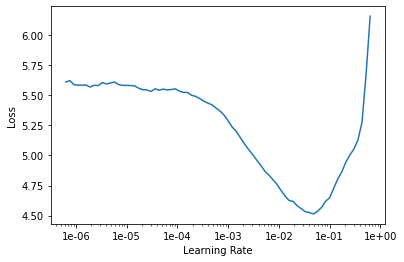

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
# frozen backbone

for i in range(3):

  learn = cnn_learner(data,models.resnet101,metrics=error_rate)
  
  if i > 0:
    learn.load('101_stage1_MP')
  learn.fit_one_cycle(1,max_lr=1e-3)
  learn.save('101_stage1_MP')
  print(i)

epoch,train_loss,valid_loss,error_rate,time
0,1.592930,1.356633,0.368446,1:34:55


0


epoch,train_loss,valid_loss,error_rate,time
0,1.415003,1.260144,0.346030,1:00:32


1


epoch,train_loss,valid_loss,error_rate,time
0,1.351306,1.225930,0.338288,59:41


2


In [ ]:
for i in range(8,11):
  learn = cnn_learner(data,models.resnet101,metrics=accuracy, model_dir='/content/gdrive/.shortcut-targets-by-id/1o9Lw6ASfakkHZu8IR1clSWJfOH6OGXwd/Shopee Objects/train/models')
  learn.unfreeze()
  if i > 0:
    learn.load('101_stage1.25_MP')
  else:
    'start'
    learn.load('101_stage1_MP')
  learn.fit_one_cycle(1,max_lr=slice(1e-4))
  learn.save('101_stage1.25_MP')
  print(i)

epoch,train_loss,valid_loss,accuracy,time
0,0.926553,1.035482,0.714143,1:08:45


8


epoch,train_loss,valid_loss,accuracy,time
0,0.881749,1.025779,0.720792,54:29


9


epoch,train_loss,valid_loss,accuracy,time
0,0.846163,1.018504,0.723927,51:02


10


In [ ]:
tfms = get_transforms()
actual_test = ImageDataBunch.from_folder(path2, train=".",valid_pct=0.,size=224,bs=bs,num_workers=8).normalize(imagenet_stats)
actual_test

ImageDataBunch;

Train: LabelList (21062 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
01,01,01,01,01
Path: /content/gdrive/.shortcut-targets-by-id/1o9Lw6ASfakkHZu8IR1clSWJfOH6OGXwd/Shopee Objects/gen_test;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /content/gdrive/.shortcut-targets-by-id/1o9Lw6ASfakkHZu8IR1clSWJfOH6OGXwd/Shopee Objects/gen_test;

Test: None

In [ ]:
valid_pct=0.08
bs=64
for i in range(2):

  data = ImageDataBunch.from_folder(path, train=".",valid_pct=valid_pct,ds_tfms=tfms,size=224,bs=bs,num_workers=8).normalize(imagenet_stats)
  data.valid_dl = actual_test.train_dl
  learn = cnn_learner(data,models.resnet101,metrics=error_rate)

  if i > 0:
    learn.load('101_stage2_MP')
    learn.freeze()
  
  else:
    print('start')
    learn.load('101_stage1.25_MP')
    learn.freeze()
  
  learn.fit_one_cycle(1, max_lr=slice(1e-4))
  learn.save('101_stage2_MP')
  print(i)

start


epoch,train_loss,valid_loss,error_rate,time
0,0.938538,0.923126,0.251900,1:19:02


0


epoch,train_loss,valid_loss,error_rate,time


In [ ]:
# learn = cnn_learner(data,models.resnet50,metrics=error_rate).load('First Trial')
# learn.export()

# test_list = ImageList.from_folder(test)

# learner= load_learner(path, test=test_list)
# preds,y = learner.get_preds(ds_type=DatasetType.Test)
# items=[str(test_list.items[i]).split('/')[-1] for i in range(preds.shape[0])]
# answers = [preds[i].argmax().item() for i in range(preds.shape[0])]
# answers = ['0'+str(answers[i]) if answers[i]<10 else str(answers[i]) for i in range(len(answers))]
# df = pd.DataFrame(list(zip(items, answers)), 
#                columns =['filename', 'category']) 
# test_csv = pd.read_csv('/content/gdrive/My Drive/Shopee Objects/test.csv')
# test_csv = test_csv['filename']
# test_csv.values
# df = df[df.filename.isin(test_csv.values).values]
# df.to_csv('submission1.csv',index=False)